In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [2]:
##get our data

train_data= datasets.MNIST(root='data',train=True,transform=ToTensor(),download=True, target_transform=None)
test_data= datasets.MNIST(root='data', train=False,transform=ToTensor(),download=True)

train_data, test_data

100%|██████████| 9912422/9912422 [00:00<00:00, 93954074.01it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85608264.19it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29465938.09it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21599238.97it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [3]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [4]:
class_names=train_data.classes

In [5]:
train_data[2]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
image, label=train_data[2]
image.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

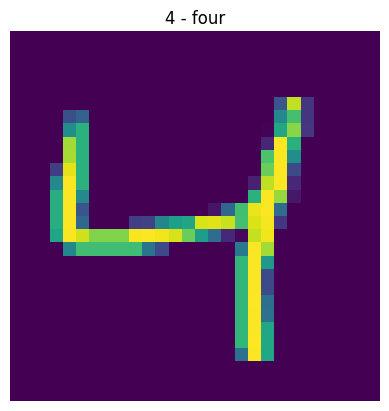

In [7]:
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)

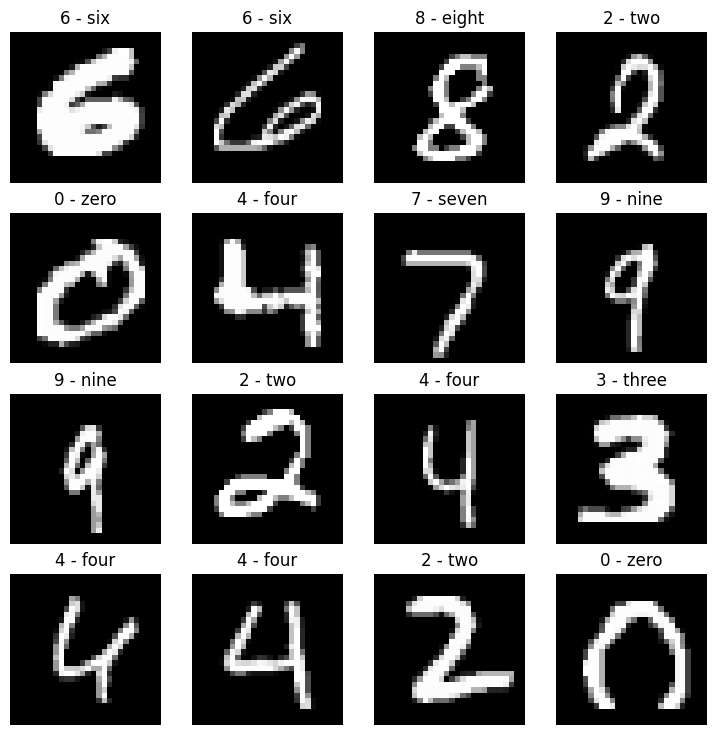

In [8]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols= 4,4
for i in range(1, rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  image, label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



In [9]:
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)

test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f253f5e2fb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f254245e7d0>)

In [10]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [11]:
train_features,train_labels=next(iter(train_dataloader))
train_features.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

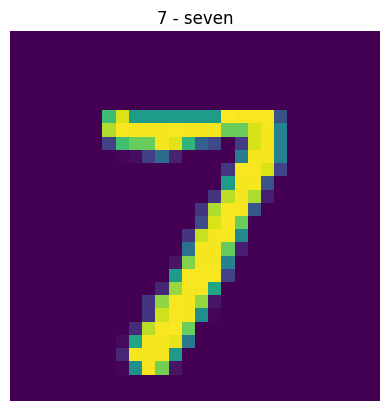

In [12]:
image=train_features[10]
label=train_labels[10]
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)

In [13]:
###device check

device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
##build TinyVGG model

from torch.nn.modules.pooling import MaxPool2d

class MNISTCNN(nn.Module):
  def __init__(self, input_shape:int,output_shape:int,hidden_units:int):
    super().__init__()
    self.ConvBlock1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=(3,3), stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,stride=1,kernel_size=(3,3),padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.ConvBlock2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=(3,3), stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )

    self.Classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )
  def forward(self,x):
    x=self.ConvBlock1(x)
    x=self.ConvBlock2(x)
    x=self.Classifier(x)

    return x


In [15]:
torch.manual_seed(42)

model=MNISTCNN(input_shape=1,
               hidden_units=10,
               output_shape=10).to(device)

In [16]:
model

MNISTCNN(
  (ConvBlock1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (ConvBlock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [17]:
model(image.unsqueeze(0).to(device))

tensor([[ 0.0339, -0.0678,  0.0527, -0.0310,  0.0008,  0.0166,  0.0031, -0.0092,
          0.0290,  0.0083]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [18]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.2 MB/s eta 0:00:00


In [19]:
import torchmetrics
from torchmetrics import Accuracy
accuracy=Accuracy("multiclass", num_classes=10).to(device)


In [20]:
##loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [21]:
## train and test functions

def train_fun(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy,
              optimizer:torch.optim,
              device:torch.device=device):
  model.train()
  
  train_loss,train_acc=0,0
  for batch,(x,y) in enumerate(dataloader):
    x,y=x.to(device),y.to(device)
    
    

    y_train=model(x)

    loss=loss_fn(y_train,y)
    train_loss +=loss
    acc=accuracy(y_train.argmax(dim=1),y)
    train_acc +=acc
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss /=len(dataloader)
  train_acc /=len(dataloader)

  print(f"train loss:{train_loss:.3f}, train accuracy: {train_acc:.3f} %")
    

In [22]:
def test_fun(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             accuracy,
             device:torch.device=device):
  test_loss,test_acc=0,0

  model.eval()
  with torch.inference_mode():
    
    for batch,(x,y) in enumerate(dataloader):
      x,y=x.to(device), y.to(device)

      y_test=model(x)

      loss=loss_fn(y_test,y)
      test_loss +=loss
      acc=accuracy(y_test.argmax(dim=1),y)
      test_acc +=acc

    test_loss /=len(dataloader)
    test_acc /=len(dataloader)

    print(f" test loss: {test_loss:.3f}, test accuracy: {test_acc:.3f}%")

In [23]:
def train_time(start:float,
               end:float,
               device:torch.device=None):
  total_time=end-start
  print(f"train time on {device} :{ total_time:.3f} seconds")

  return total_time
  

In [24]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start=timer()

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=4

for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch} \n......")
  train_fun(
      model=model,
      loss_fn=loss_fn,
      dataloader=train_dataloader,
      accuracy=accuracy,
      optimizer=optimizer,
      device=device)
  
  test_fun(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy=accuracy,
            device=device)
  
train_end_time=timer()
train_time(start=train_time_start,
           end=train_end_time,
           device=device)

  0%|          | 0/4 [00:00<?, ?it/s]

epoch:0 
......
train loss:0.333, train accuracy: 0.888 %
 test loss: 0.072, test accuracy: 0.977%
epoch:1 
......
train loss:0.081, train accuracy: 0.975 %
 test loss: 0.062, test accuracy: 0.980%
epoch:2 
......
train loss:0.064, train accuracy: 0.980 %
 test loss: 0.057, test accuracy: 0.981%
epoch:3 
......
train loss:0.055, train accuracy: 0.983 %
 test loss: 0.067, test accuracy: 0.977%
train time on cuda :71.047 seconds


71.04713563400003